<a href="https://colab.research.google.com/github/brycemcwilliams/research-papers/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Firstly, let's select TensorFlow version 2.x in colab

In [34]:
%tensorflow_version 2.x
import tensorflow

tensorflow.__version__

'2.2.0'

In [35]:
# Initialize the random number generator
import random

random.seed(0)

In [36]:
# Ignore the warnings
import warnings

warnings.filterwarnings("ignore")

Let's load MNIST dataset

In [37]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


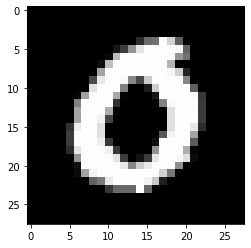

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

### Print shape of the data

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [40]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [42]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [43]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [45]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [48]:
# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0861 - val_accuracy: 0.9861
Epoch 2/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0944 - val_accuracy: 0.9858
Epoch 3/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0867 - val_accuracy: 0.9873
Epoch 4/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1033 - val_accuracy: 0.9851
Epoch 5/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0935 - val_accuracy: 0.9870
Epoch 6/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1025 - val_accuracy: 0.9857
Epoch 7/10
1313/1313 [==============================] - 12s 9ms/step - loss: 9.9950e-04 - accuracy: 0.9997 - val_loss: 0.0932 - va

### Final loss and accuracy

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.9863


[0.09153053909540176, 0.986299991607666]

## Vanilla CNN + Pooling + Dropout

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [50]:
from tensorflow.keras.layers import MaxPooling2D, Dropout

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use Early Stopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [51]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1232 - accuracy: 0.9611 - val_loss: 0.0472 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0406 - val_accuracy: 0.9875


### Final loss and accuracy

In [53]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9875


[0.04055158793926239, 0.987500011920929]

Let's visualize results using matplotlib

Predicted label: 6
Softmax Outputs: [[8.24671531e-07 3.88156757e-10 8.58352278e-11 2.80309803e-10
  9.62173896e-09 1.31236195e-08 9.99999166e-01 1.39017669e-11
  4.90354779e-08 7.54032184e-11]]
1.0


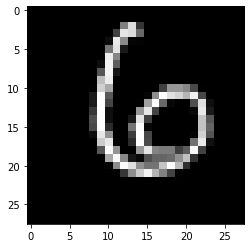

In [54]:
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())